In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
from pathlib import Path
# from skimage import exposure, filters, measure, morphology, segmentation, util
from segmentflow import segment, view
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Save grayscale images

Loading images...
--> Images loaded as 3D array:  (1012, 1024, 1003)
Preprocessing images...
--> Applying median filter...
--> Rescaling intensities to percentile range [24.8, 99.9]...
--> Preprocessing complete.
--> Plotting images: [253 506 759]


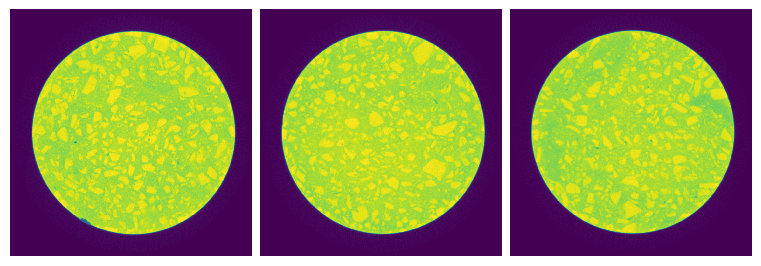

In [2]:
dir_path = (
    r'C:\Users\cgusb\Research\mhe-analysis\data\I43.09\bin-2-tiffs')
imgs = segment.load_images(dir_path)
imgs = segment.preprocess(
    imgs,
    median_filter=True,
    rescale_intensity_range=[24.8, 99.9]
)
fig, axes = view.vol_slices(imgs, exclude_bounding_slices=True)

In [14]:
save_dir = Path(
    r'C:\Users\cgusb\Research\mhe-analysis\results\I43.09_bin2'
    r'\I43.09_bin2_frames')
if not save_dir.exists():
    save_dir.mkdir(parents=True)
scalebar_dict=dict(
    dx=6.011, units="um", length_fraction=0.1,
    border_pad=2, font_properties={'size':'medium'}, location='lower right')
# for frame_i in range(99, 800):
for frame_i in [250]:
    fig, axes = view.images(
        imgs[frame_i, ...], cmap='gray')
    if not isinstance(axes, np.ndarray):
        axes = [axes]
    for a in axes:
        # Create scale bar
        scalebar = ScaleBar(**scalebar_dict)
        a.add_artist(scalebar)
    # plt.savefig(Path(save_dir) / f'{str(frame_i+1).zfill(3)}.png')
    plt.close()

## Save color labeled images

In [6]:
[plt.cm.tab20(i)[:3] for i in range(20)]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.74117647

In [10]:
tab20_colors = []
for i in range(20):
    rgb_float = plt.cm.tab20(i)[:3]
    rgb_ubyte = [int(c * 255) for c in rgb_float]
    tab20_colors.append(rgb_ubyte)
tab20_colors

[[31, 119, 180],
 [174, 199, 232],
 [255, 127, 14],
 [255, 187, 120],
 [44, 160, 44],
 [152, 223, 138],
 [214, 39, 40],
 [255, 152, 150],
 [148, 103, 189],
 [197, 176, 213],
 [140, 86, 75],
 [196, 156, 148],
 [227, 119, 194],
 [247, 182, 210],
 [127, 127, 127],
 [199, 199, 199],
 [188, 189, 34],
 [219, 219, 141],
 [23, 190, 207],
 [158, 218, 229]]

In [12]:
viridis_colors = []
cm = mpl.cm.get_cmap('viridis')
norm = mpl.colors.Normalize(vmin=0, vmax=2)
for i in range(3):
    rgb_float = cm(norm(i))[:3]
    rgb_ubyte = [int(c * 255) for c in rgb_float]
    viridis_colors.append(rgb_ubyte)
viridis_colors

[[68, 1, 84], [32, 144, 140], [253, 231, 36]]